# New Particle Detection with Neural Network
**Team Member:** **Yucheol-Shin**, **Ricco Ferraro**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
   <ul class="toc-item">
      <li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li>
      <li>
         <span><a href="#Data-Evaluation-and-Engineering" data-toc-modified-id="Data-Evaluation-and-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Evaluation and Engineering</a></span>
         <ul class="toc-item">
            <li><span><a href="#Summary-of-dataset" data-toc-modified-id="Summary-of-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary of dataset</a></span></li>
            <li><span><a href="#Dependent-Variable" data-toc-modified-id="Dependent-Variable-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dependent Variable</a></span></li>
         </ul>
      </li>
      <li>
         <span><a href="#Model-Preparation" data-toc-modified-id="Model-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Preparation</a></span>
         <ul class="toc-item">
            <li><span><a href="#Proposed-Methods" data-toc-modified-id="Proposed-Methods-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Proposed Methods</a></span></li>
            <li><span><a href="#Target-Variable" data-toc-modified-id="Target-Variable-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Target Variable</a></span></li>
            <li><span><a href="#Scaling" data-toc-modified-id="Scaling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Scaling</a></span></li>
            <li><span><a href="#Test/Train-split" data-toc-modified-id="Test/Train-split-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Test/Train split</a></span></li>
            <li><span><a href="#Evaluation-Method" data-toc-modified-id="Evaluation-Method-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Evaluation Method</a></span></li>
            <li><span><a href="#Preprossing" data-toc-modified-id="Preprossing-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Preprossing</a></span></li>
         </ul>
      </li>
      <li><span><a href="#Model-Building-&amp;-Evaluation" data-toc-modified-id="Model-Building-&amp;-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Building &amp; Evaluation</a></span></li>
      <li><span><a href="#Case-Conclusions" data-toc-modified-id="Case-Conclusions-5"><span class="toc-item-num">6&nbsp;&nbsp;</span>Case Conclusions</a></span></li>
   </ul>
</div>

## Business Understanding
Given a larget data set containing data pretaining to the existence of a new particle, the goal in this study is to predict the existence of this new particle. Prediction accuracy is the primary objective given the massive size of data. In the dataset, label 1 is for detection and 0 for non-detection of new particle.

## Data Evaluation and Engineering

### Summary of dataset
There are in total 7 million records in our dataset.There are no missing values in this dataset and our target variable is balanced. In total, there are 28 independent variables and 1 target variable  `'# label'`.

In [1]:
# imports 
import pandas as pd
from scipy.io import arff
pd.set_option('display.max_columns', 500)
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import glob, os


In [2]:
#change directory folder
# Chris' path
curPath = os.getcwd().replace("\\", "/")
os.chdir(curPath+"/data")

# Ricco's Path
# os.chdir("QTW/log2.csv")

In [3]:
df = pd.read_csv(Path.cwd()/"all_train.csv.gz", compression='gzip',
                   error_bad_lines=False)
df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,2.269852,-1.300984,-1.199420,-1.161915,3.357043,0.460796,-0.404118,-0.815440,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,0.459217,-0.695640,0.359856,-1.161915,-0.502048,0.505149,-1.500441,1.226331,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,-1.031239,1.912465,-1.321417,-1.161915,-0.406757,1.346497,-0.298099,1.226331,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,1.142262,0.551081,1.016731,0.860649,0.454005,0.624624,1.439072,-0.815440,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,-0.181512,-1.329374,0.879087,0.860649,-0.143564,-1.293935,-1.222800,-0.815440,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [4]:
df.describe(include = "all")

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,-6.869956e-03,1.754267e-02,-1.610605e-04,-3.289412e-04,1.738506e-03,1.724634e-02,4.830252e-04,-5.536178e-04,4.960189e-03,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,1.001938e+00,9.941511e-01,9.984497e-01,1.000078e+00,9.997368e-01,9.994654e-01,9.984289e-01,9.998608e-01,1.001006e+00,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,-1.325801e+00,-2.835563e+00,-2.602091e+00,-1.732216e+00,-1.161915e+00,-2.454879e+00,-2.437812e+00,-1.732145e+00,-8.154401e-01,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,-1.325801e+00,-7.237266e-01,-7.032926e-01,-8.665987e-01,-1.161915e+00,-6.996179e-01,-7.070255e-01,-8.662470e-01,-8.154401e-01,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,7.542607e-01,-1.285732e-01,-5.755420e-04,-1.282098e-03,8.606486e-01,-9.749269e-02,2.975658e-04,-1.376716e-03,-8.154401e-01,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,7.542607e-01,6.478635e-01,7.041004e-01,8.658323e-01,8.606486e-01,6.347052e-01,7.083709e-01,8.649424e-01,1.226331e+00,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,7.542607e-01,4.639335e+00,2.602294e+00,1.732007e+00,8.606486e-01,5.535799e+00,2.438369e+00,1.732738e+00,1.226331e+00,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [5]:
df.shape

(7000000, 29)

### Missing Values
As can be seen below, there is no missing values.

In [110]:
num_vars =df.columns[df.dtypes != 'object']
df[num_vars].isnull().sum()

# label    0
f0         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
mass       0
dtype: int64

### Dependent Variable
As can be seen below, we have a balanced data for our dependent variable. We get roughly 50% for each label.

<AxesSubplot:xlabel='# label', ylabel='count'>

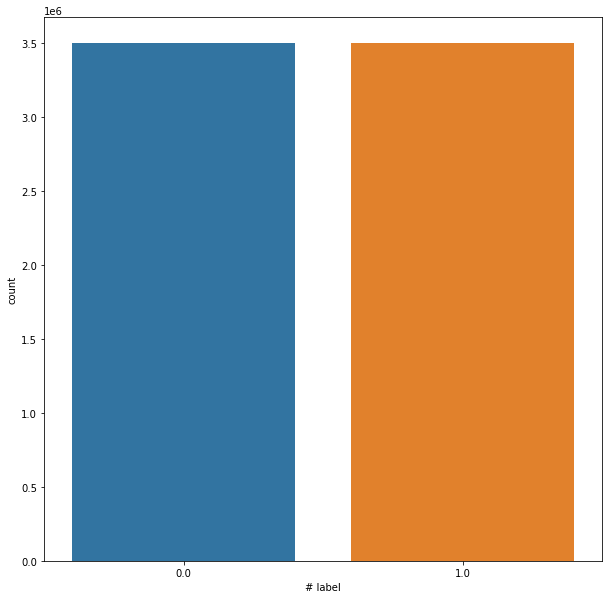

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.countplot(data=df, x='# label', ax=ax)

In [9]:
print(f"Percentage of label 0 = {df[df['# label'] == 0]['# label'].count() / df.shape[0]}")

Percentage of label 0 = 0.49987442857142855


In [10]:
print(f"Percentage of label 1 = {df[df['# label'] == 1]['# label'].count() / df.shape[0]}")

Percentage of label 1 = 0.5001255714285714


### Distribution of Features
As can be seen below, we have analyzed the distribution of features. It appears that most features are somewhat normaly distriubted and there is some separability for certain features, such as `f14` and `f18`.

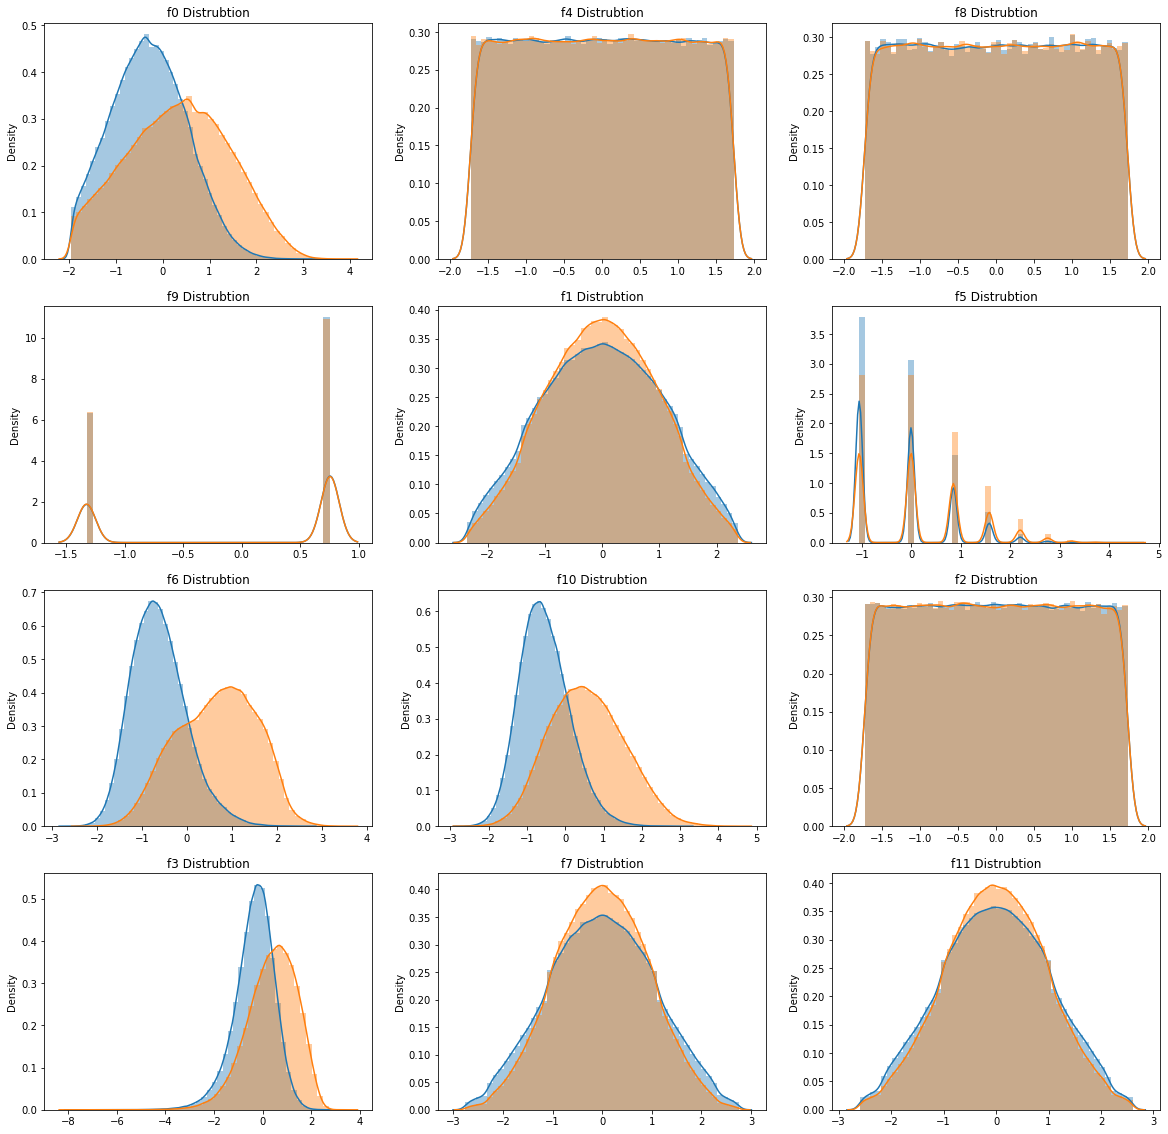

In [111]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))

df_sample = df.sample(frac=0.1, replace=False, random_state=1)
df_sample_0 = df_sample[df_sample['# label'] == 0]
df_sample_1 = df_sample[df_sample['# label'] == 1]
for i, column in enumerate(df.columns[1:13]):
    row = i % 4
    col = i % 3
    ax = axes[row, col]
    sns.distplot(x=df_sample_0[column], ax=ax)
    ax.set_title(f"{column} Distrubtion")
    
    sns.distplot(x=df_sample_1[column], ax=ax)
    ax.set_title(f"{column} Distrubtion")

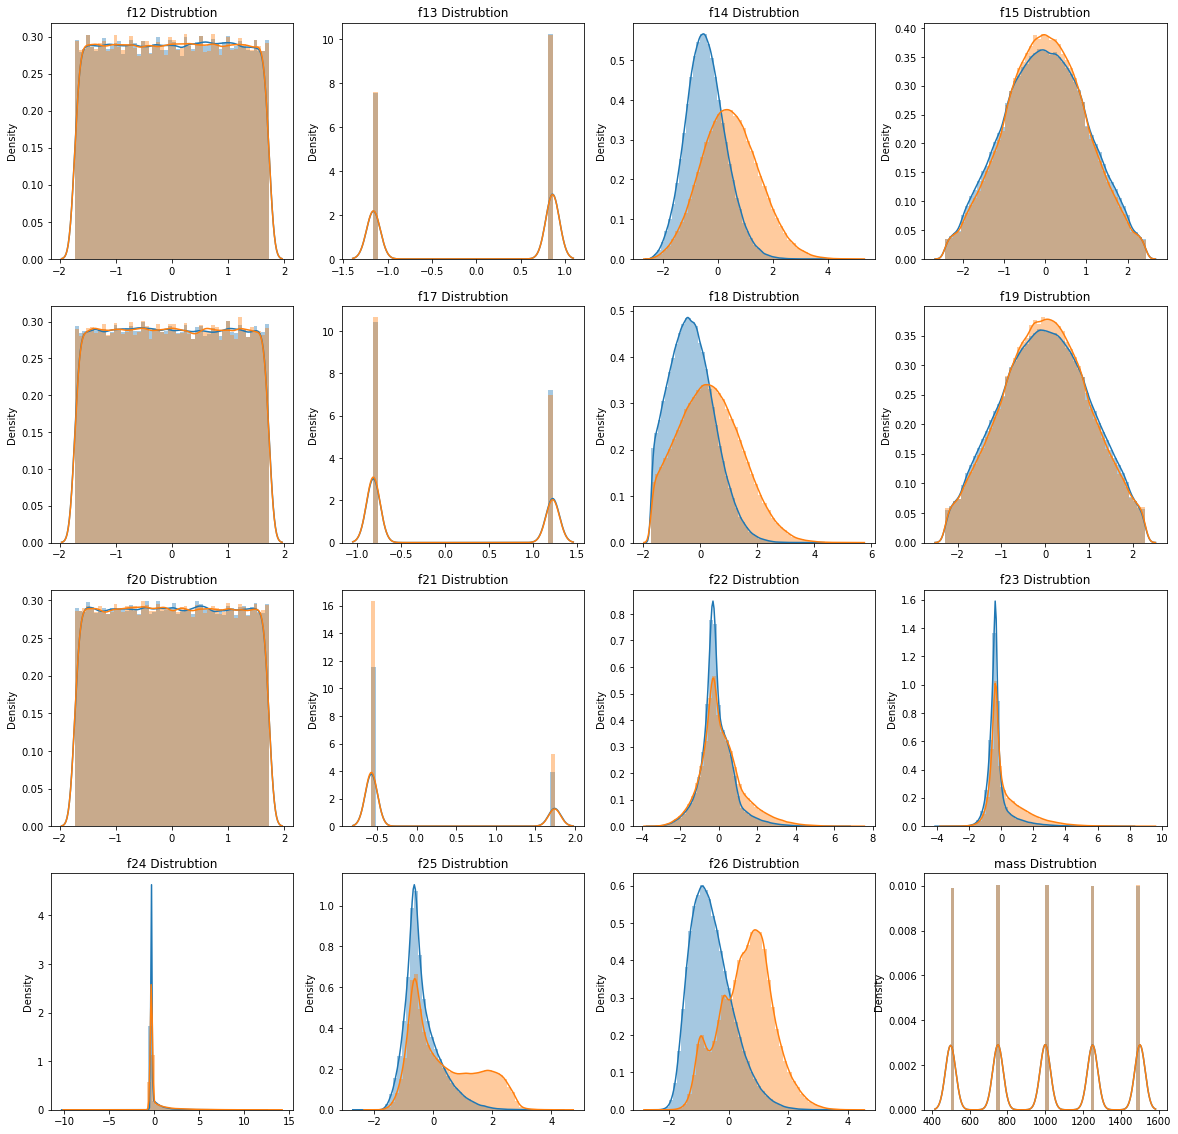

In [95]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for i, column in enumerate(df.columns[13:]):
    row = int(i / 4)
    col = i % 4
    ax = axes[row, col]
    sns.distplot(x=df_sample_0[column], ax=ax, hist_kws=dict(alpha=0.2))
    ax.set_title(f"{column} Distrubtion")
    
    sns.distplot(x=df_sample_1[column], ax=ax)
    ax.set_title(f"{column} Distrubtion")

### Correlation Heatmap
As can be seen below, there is some correlation between features. Due to the fact that prediction accuracy is our goal not the model interpretation this cross correlation is acceptable.

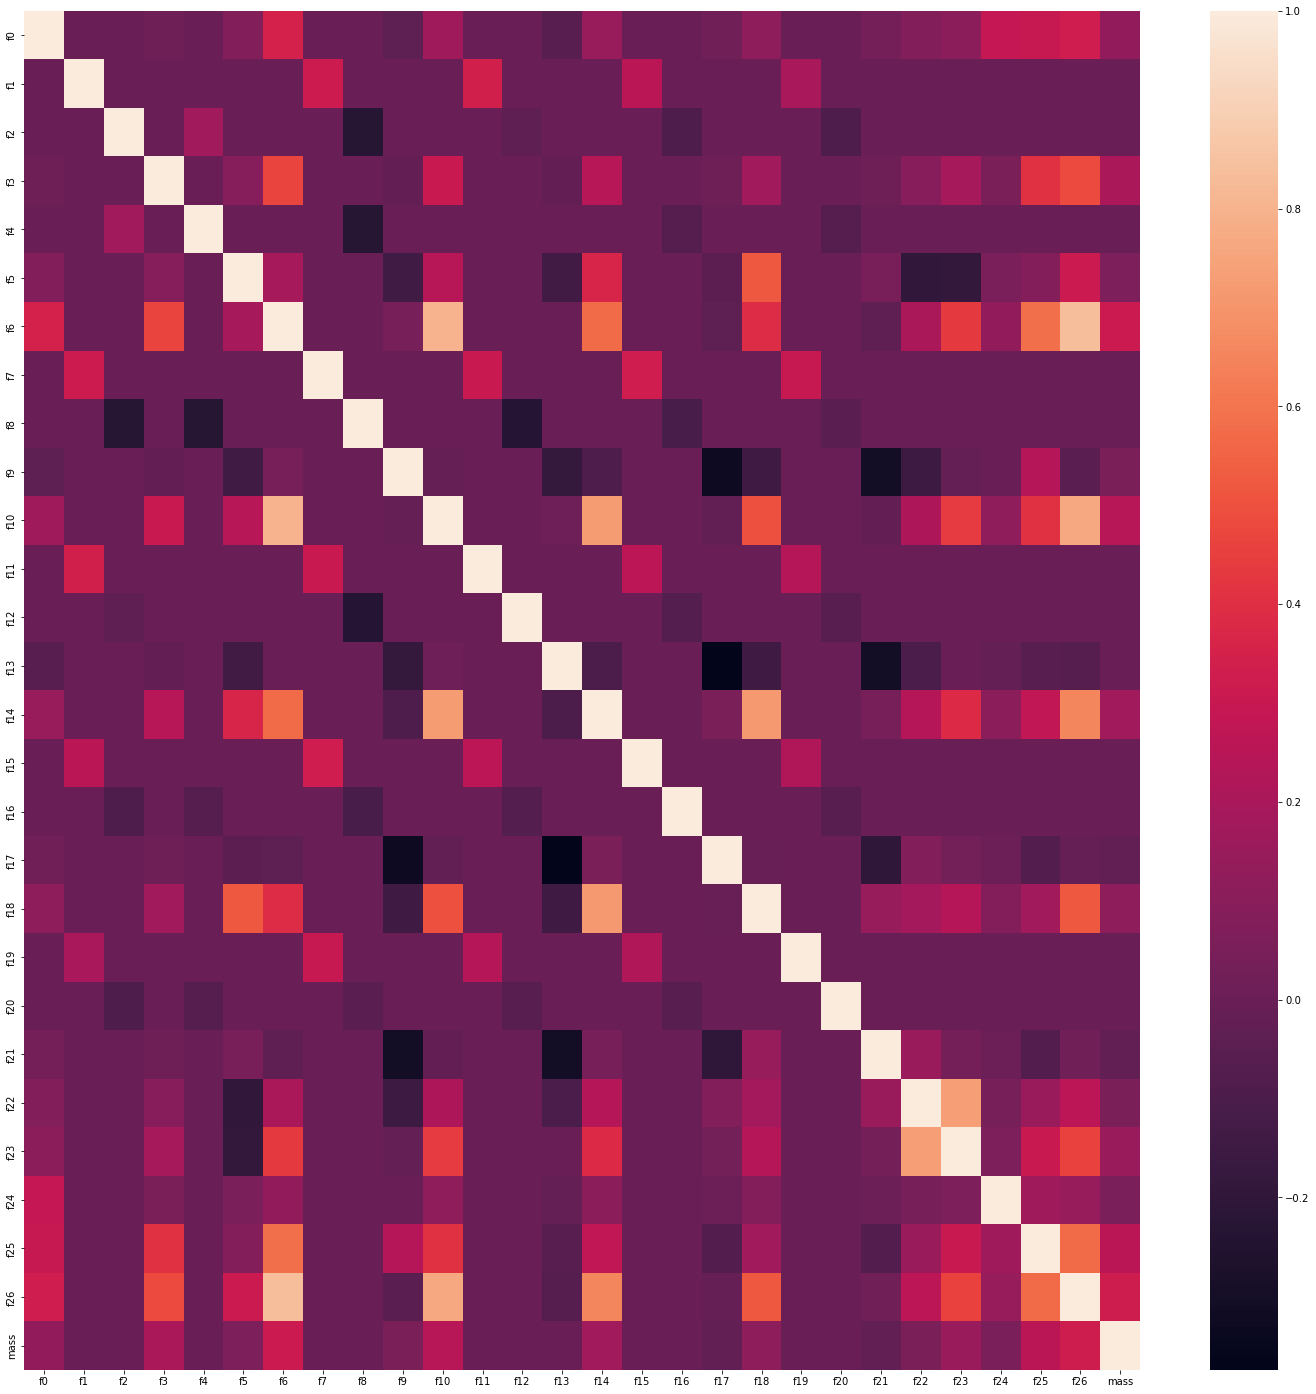

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,25));
sns.heatmap(df.drop(columns=['# label']).corr(), ax = ax);

## Model Preparation
### Proposed Methods
We propose using **Deep Neural Networks** to classify if a new particle is detected or not. We propose comparing two neural network models with various numbers of layers and batch sizes. We used `ReLu` activation for hidden layers to mitigate the vanishing gradient problem and `sigmoid` activation for the output layer.


### Target Variable
Target is `'# label'`, `1` means new particle is detected and 0 means new particle is not detected.


### Scaling
In order to compare feature importances and to ensure the best predictive power, standardized z-score centering and scaling is performed on all explanatory features. 


### Test/Train split
In order to evaluate the quality of this binary classification problem, we choose a randomized `80%/20%` train/test split where 80% of the data is used for training, and the remaining 20% data is held out to evaluate test accuracy. By keeping a holdout set, and being careful not to allow any of that holdout 'test' set to leak into our model, including feature engineering. As part of the model fitting for the neural network, we use `20%` of training set as validation set to do cross validation.

### Evaluation Method
Because our case study is a binary classification problem, `0` or `1`, we can visualize the outcome of a binary classification model using a confusion matrix to generate metrics like accuracy. Since the data is balanced, we can use accuracy score to measure the performance of the binary classification.

### Preprossing
In this section, we split the data into train/test subsets. Standardized z-score centering and scaling is performed on all explanatory features. 

In [11]:
train, test = train_test_split(df, test_size=0.2)

In [12]:
train.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06
mean,5.000630e-01,1.638527e-02,6.094421e-05,-2.131614e-04,1.022708e-02,1.860883e-04,2.445628e-03,1.776398e-02,4.284475e-04,6.256693e-04,-6.858887e-03,1.713810e-02,-3.322923e-04,-5.105991e-04,1.948419e-03,1.678106e-02,5.001263e-04,-4.386417e-04,4.919499e-03,1.120116e-02,-4.117382e-05,-1.797657e-05,2.643597e-04,1.234895e-02,9.704584e-03,5.135505e-03,-1.897086e-03,1.495028e-02,1.000112e+03
std,5.000000e-01,1.004459e+00,9.975449e-01,1.000054e+00,9.956637e-01,9.998766e-01,1.000841e+00,9.867222e-01,9.965694e-01,1.000054e+00,1.001935e+00,9.941548e-01,9.986463e-01,1.000242e+00,9.997048e-01,9.993304e-01,9.984447e-01,9.998178e-01,1.000998e+00,1.002427e+00,1.000115e+00,9.999867e-01,1.000154e+00,1.010597e+00,1.005551e+00,1.009238e+00,9.844661e-01,9.822051e-01,3.534386e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757826e+00,-1.732359e+00,-1.325801e+00,-2.835563e+00,-2.602082e+00,-1.732216e+00,-1.161915e+00,-2.454879e+00,-2.437812e+00,-1.732145e+00,-8.154401e-01,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-2.925114e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.286305e-01,-7.337244e-01,-8.659144e-01,-6.096483e-01,-8.654124e-01,-1.054221e+00,-7.569513e-01,-7.008138e-01,-8.654283e-01,-1.325801e+00,-7.241306e-01,-7.036654e-01,-8.671997e-01,-1.161915e+00,-7.002083e-01,-7.069581e-01,-8.659933e-01,-8.154401e-01,-7.427062e-01,-7.207782e-01,-8.657076e-01,-5.736825e-01,-5.417996e-01,-5.115522e-01,-3.543815e-01,-6.926095e-01,-7.947090e-01,7.500000e+02
50%,1.000000e+00,-3.916778e-02,5.936497e-05,-1.102357e-04,1.936589e-02,-2.934313e-05,-5.983562e-03,-1.504193e-01,3.517721e-04,1.741403e-03,7.542607e-01,-1.291026e-01,-9.606632e-04,-1.772754e-03,8.606486e-01,-9.802626e-02,2.463193e-04,-1.238576e-03,-8.154401e-01,-9.050139e-02,-4.155421e-05,-7.069363e-04,-5.736825e-01,-1.602192e-01,-3.144836e-01,-3.265091e-01,-3.571519e-01,-8.873292e-02,1.000000e+03
75%,1.000000e+00,6.903449e-01,7.345887e-01,8.655440e-01,6.794704e-01,8.661230e-01,8.504885e-01,7.681401e-01,7.017232e-01,8.669669e-01,7.542607e-01,6.470649e-01,7.042860e-01,8.657441e-01,8.606486e-01,6.343631e-01,7.083482e-01,8.650306e-01,1.226331e+00,6.417916e-01,7.205367e-01,8.657085e-01,-5.736825e-01,4.811575e-01,1.631020e-01,-2.338081e-01,4.750488e-01,7.606873e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,7.542607e-01,4.639335e+00,2.602294e+00,1.732007e+00,8.606486e-01,5.535799e+00,2.438369e+00,1.732738e+00,1.226331e+00,5.866367e+00,2.282209e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [13]:
test.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06
mean,5.003757e-01,1.508536e-02,2.141234e-03,9.869746e-04,1.189574e-02,-1.269366e-03,4.047083e-03,1.974171e-02,-1.588242e-03,-3.297425e-04,-6.914231e-03,1.916098e-02,5.238670e-04,3.976903e-04,8.988529e-04,1.910748e-02,4.146206e-04,-1.013522e-03,5.122947e-03,1.343483e-02,-3.988531e-04,4.562428e-04,3.971623e-04,1.204289e-02,1.007355e-02,5.807200e-03,-1.216460e-03,1.685567e-02,1.000087e+03
std,5.000000e-01,1.004246e+00,9.972512e-01,1.000180e+00,9.953459e-01,9.998281e-01,1.001419e+00,9.869829e-01,9.966548e-01,9.998166e-01,1.001950e+00,9.941348e-01,9.976630e-01,9.994209e-01,9.998647e-01,1.000003e+00,9.983662e-01,1.000033e+00,1.001039e+00,1.003916e+00,9.997309e-01,1.000218e+00,1.000232e+00,1.009994e+00,1.004886e+00,1.012995e+00,9.843911e-01,9.825776e-01,3.533733e+02
min,0.000000e+00,-1.960549e+00,-2.365298e+00,-1.732165e+00,-8.908311e+00,-1.732132e+00,-1.054221e+00,-2.702376e+00,-2.757853e+00,-1.732359e+00,-1.325801e+00,-2.792295e+00,-2.602091e+00,-1.732216e+00,-1.161915e+00,-2.451617e+00,-2.437804e+00,-1.732145e+00,-8.154401e-01,-1.728284e+00,-2.281859e+00,-1.731758e+00,-5.736825e-01,-3.582276e+00,-4.170301e+00,-1.289945e+01,-3.452634e+00,-2.521423e+00,5.000000e+02
25%,0.000000e+00,-7.296778e-01,-7.314832e-01,-8.647220e-01,-6.074662e-01,-8.673972e-01,-1.054221e+00,-7.552710e-01,-7.037278e-01,-8.666866e-01,-1.325801e+00,-7.221799e-01,-7.019011e-01,-8.640584e-01,-1.161915e+00,-6.972368e-01,-7.072671e-01,-8.672010e-01,-8.154401e-01,-7.409835e-01,-7.202678e-01,-8.655862e-01,-5.736825e-01,-5.417824e-01,-5.115522e-01,-3.544089e-01,-6.921418e-01,-7.930214e-01,7.500000e+02
50%,1.000000e+00,-3.994131e-02,3.967876e-03,1.838223e-03,2.078451e-02,-2.626202e-03,-5.983562e-03,-1.480226e-01,-1.942590e-03,1.019326e-04,7.542607e-01,-1.264473e-01,1.006208e-03,7.685826e-04,8.606486e-01,-9.532145e-02,4.843180e-04,-1.939893e-03,-8.154401e-01,-8.752324e-02,-1.515558e-04,6.464518e-04,-5.736825e-01,-1.605061e-01,-3.140549e-01,-3.265802e-01,-3.565027e-01,-8.632879e-02,1.000000e+03
75%,1.000000e+00,6.890725e-01,7.356153e-01,8.674918e-01,6.815661e-01,8.642002e-01,8.504885e-01,7.708265e-01,6.997240e-01,8.650609e-01,7.542607e-01,6.511907e-01,7.034181e-01,8.661411e-01,8.606486e-01,6.361412e-01,7.084501e-01,8.645012e-01,1.226331e+00,6.444966e-01,7.202593e-01,8.670374e-01,-5.736825e-01,4.814810e-01,1.647639e-01,-2.336057e-01,4.763382e-01,7.625122e-01,1.250000e+03
max,1.000000e+00,4.014482e+00,2.365126e+00,1.732370e+00,3.840673e+00,1.731978e+00,4.482618e+00,3.581360e+00,2.758544e+00,1.731450e+00,7.542607e-01,4.362792e+00,2.602294e+00,1.732007e+00,8.606486e-01,4.966144e+00,2.438352e+00,1.732738e+00,1.226331e+00,5.482419e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.273588e+00,9.158033e+00,1.490263e+01,4.614324e+00,4.348182e+00,1.500000e+03


In [14]:
X_train = train.drop(columns=['# label'])
X_test = test.drop(columns=['# label'])
y_train = train['# label']
y_test = test['# label']

In [15]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)

    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
            # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            print("Transformer %s (type %s) does not "
                  "provide get_feature_names. "
                  "Will return input column names if available"
                  % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]

    ### Start of processing
    feature_names = []

    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))


    for name, trans, column, _ in l_transformers:
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))

    return feature_names

In [16]:
t_slr = [('scale', MinMaxScaler(), X_train.columns)]
col_transform = ColumnTransformer(t_slr, remainder='passthrough')
col_transform.fit(X_train)
X_train_scaled_array = col_transform.transform(X_train)
X_test_scaled_array = col_transform.transform(X_test)
column_names = get_feature_names(col_transform)
X_train_scaled = pd.DataFrame(data=X_train_scaled_array, columns=column_names, index=X_train.index)
X_test_scaled = pd.DataFrame(data=X_test_scaled_array, columns=column_names, index=X_test.index)

Transformer scale (type MinMaxScaler) does not provide get_feature_names. Will return input column names if available


In [17]:
print(f"missing from X {np.any(np.isnan(X_train_scaled))}")
print(f"missing from y {np.any(np.isnan(y_train))}")

missing from X False
missing from y False


In [18]:
y_train

1482495    1.0
3641235    1.0
2449059    0.0
4911833    0.0
676562     1.0
          ... 
5342882    0.0
2004684    0.0
5414595    1.0
6328404    1.0
2257492    1.0
Name: # label, Length: 5600000, dtype: float64

In [19]:
X_train_scaled

,scale__f0,scale__f1,scale__f2,scale__f3,scale__f4,scale__f5,scale__f6,scale__f7,scale__f8,scale__f9,scale__f10,scale__f11,scale__f12,scale__f13,scale__f14,scale__f15,scale__f16,scale__f17,scale__f18,scale__f19,scale__f20,scale__f21,scale__f22,scale__f23,scale__f24,scale__f25,scale__f26,scale__mass
1482495,0.584426,0.663216,0.100384,0.809729,0.158733,0.000000,0.607636,0.400537,0.617051,1.0,0.209053,0.278143,0.703774,1.0,0.171764,0.527658,0.612089,0.0,0.017404,0.395294,0.819224,0.0,0.209489,0.270752,0.576647,0.494235,0.478183,0.75
3641235,0.225494,0.854896,0.757371,0.692097,0.028751,0.000000,0.541388,0.751328,0.850612,1.0,0.495000,0.597990,0.492713,1.0,0.482533,0.541743,0.189339,0.0,0.416351,0.466390,0.350285,0.0,0.380079,0.434842,0.569023,0.307639,0.431584,0.25
2449059,0.215655,0.706145,0.006073,0.697536,0.849291,0.000000,0.414454,0.536871,0.541713,1.0,0.373833,0.800048,0.175496,1.0,0.198038,0.215589,0.884687,0.0,0.153411,0.646747,0.409721,0.0,0.421587,0.408258,0.568820,0.361518,0.342303,0.25
4911833,0.336786,0.656141,0.591094,0.534886,0.296931,0.344007,0.345117,0.634471,0.096249,0.0,0.341567,0.743774,0.314825,1.0,0.262794,0.885916,0.876817,0.0,0.191164,0.545258,0.744656,1.0,0.217303,0.317294,0.569423,0.192128,0.245237,0.00
676562,0.597663,0.301332,0.781841,0.739823,0.764961,0.588083,0.471849,0.835919,0.199203,0.0,0.382497,0.837635,0.366106,0.0,0.368488,0.459862,0.315477,1.0,0.405896,0.596818,0.414268,0.0,0.353772,0.339354,0.570838,0.444633,0.591392,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342882,0.158166,0.082926,0.072615,0.683091,0.373256,0.189321,0.154826,0.582630,0.823642,0.0,0.157008,0.495687,0.723334,1.0,0.158283,0.507937,0.377761,0.0,0.144160,0.254902,0.173999,0.0,0.298888,0.310026,0.568797,0.268082,0.143142,0.50
2004684,0.264875,0.170654,0.929103,0.708580,0.987050,0.000000,0.412006,0.895266,0.506659,0.0,0.342185,0.185173,0.132828,1.0,0.220917,0.726809,0.744682,1.0,0.130156,0.728480,0.423789,0.0,0.309708,0.312513,0.572303,0.297289,0.518499,0.50
5414595,0.344277,0.527386,0.741849,0.663047,0.027601,0.000000,0.515853,0.626075,0.725461,1.0,0.487266,0.183148,0.270404,0.0,0.193079,0.166926,0.085952,1.0,0.038589,0.487011,0.337442,0.0,0.398232,0.321576,0.577553,0.312353,0.447519,0.75
6328404,0.421315,0.324261,0.306289,0.758390,0.375391,0.474792,0.488332,0.790365,0.867755,0.0,0.313222,0.625564,0.843851,1.0,0.308515,0.509820,0.459206,1.0,0.207967,0.392113,0.833045,0.0,0.305424,0.315221,0.567352,0.255602,0.432167,0.50


## Model Building & Evaluation

### Model 1 - 3 layers Neural Network
We build a neural network model with 3 layers, including 2 hidden layers with `512` and `128` neurons and utilize `ReLu` activation function to avoid vanishing gradient. Note these layers are fully connected and dense. Finally, we have 1 output layer with a `sigmoid` activation function. We used sigmoid for the output layer as we want to predict the binary result. 

For the loss function, binary cross entropy is used. And training validation accuracy is used for overall model evaluation. Test accuracy is used to ensure there is no overfitting.

Since our dataset is large with more than 7 miliions of records, we apply batch size of 1000 to reduce the computation time. This also ensures enough backpropagation occurs. We also utilize a validation split of 20%.

In [49]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Input(28),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
nn_model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

In [51]:
label_model = nn_model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    validation_split = 0.2,
    batch_size=1000
)

Epoch 1/10
4480/4480 [==============================] - 18s 4ms/step - loss: 0.3055 - accuracy: 0.8568 - val_loss: 0.2886 - val_accuracy: 0.8669
Epoch 2/10
4480/4480 [==============================] - 17s 4ms/step - loss: 0.2842 - accuracy: 0.8693 - val_loss: 0.2797 - val_accuracy: 0.8721
Epoch 3/10
4480/4480 [==============================] - 17s 4ms/step - loss: 0.2775 - accuracy: 0.8734 - val_loss: 0.2748 - val_accuracy: 0.8750
Epoch 4/10
4480/4480 [==============================] - 15s 3ms/step - loss: 0.2734 - accuracy: 0.8757 - val_loss: 0.2730 - val_accuracy: 0.8760
Epoch 5/10
4480/4480 [==============================] - 15s 3ms/step - loss: 0.2708 - accuracy: 0.8772 - val_loss: 0.2700 - val_accuracy: 0.8778
Epoch 6/10
4480/4480 [==============================] - 15s 3ms/step - loss: 0.2691 - accuracy: 0.8782 - val_loss: 0.2723 - val_accuracy: 0.8763
Epoch 7/10
4480/4480 [==============================] - 16s 4ms/step - loss: 0.2680 - accuracy: 0.8788 - val_loss: 0.2687 - val_ac

In [82]:
def plot_loss(model):
    plt.plot(model.history['loss'], label='loss')
    plt.plot(model.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    
def plot_acc(model):
    plt.plot(model.history['accuracy'], label='accuracy')
    plt.plot(model.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Training and Validation Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

##### Loss and Accuracy vs Epoch
As can be seen below, around epoch 8 the validation loss reaches hinge point. This represents the model no longer to be trained.

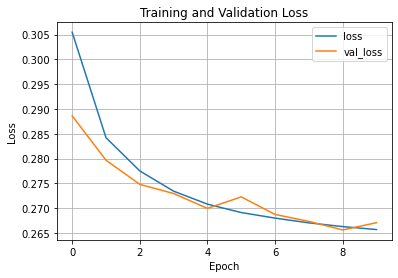

In [83]:
plot_loss(label_model)

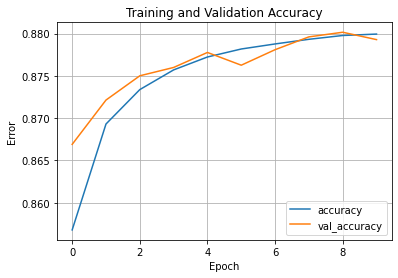

In [84]:
plot_acc(label_model)

##### Confusion Matrix

As can be seen below, the model predicted both True Negative and True Positive fairly well with at 43% and 44% respectively.

Text(0.5, 1.0, 'Confusion Matrix as Percentage')

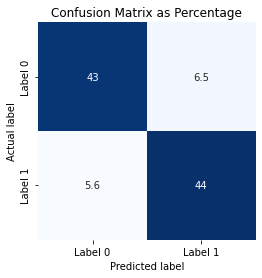

In [145]:
y_predicted = nn_model.predict(X_test_scaled) > 0.5
mat = confusion_matrix(y_test, y_predicted)
mat_percent = mat / len(y_test) * 100
labels = ['Label 0', 'Label 1']
 
sns.heatmap(mat_percent, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Confusion Matrix as Percentage")

##### Accuracy 
With 3 layer neural network, it achieved 88% accuracy.

In [126]:
print(f"Accuracy of binary classification is {accuracy_score(y_test, y_predicted)}")

Accuracy of binary classification is 0.87879


### Model 2 - 4 Layers Neural Network
We build a neural network model with 4 layers, including 3 hidden layers with `512`, `128`, and `16` neurons and utilize `ReLu` activation function to avoid vanishing gradient. Note these layers are fully connected and dense. Finally, we have 1 output layer with a `sigmoid` activation function. We used sigmoid for the output layer as we want to predict the binary result. 

For the loss function, binary cross entropy is used. And training validation accuracy is used for overall model evaluation. Test accuracy is used to ensure there is no overfitting.

For this model, we apply batch size of 500 and 100 epochs. The intent of this neural network is primarlly to test whether or not additional hidden layer improves the prediction accuracy. Lastly, early stopping with patience of 5 epochs is used to prevent excessive run time.

In [105]:
import tensorflow as tf

nn_model2 = tf.keras.Sequential([
    tf.keras.layers.Input(28),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [107]:
nn_model2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

In [109]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

nn_history = nn_model2.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=500,
    callbacks=[callback]
)

Epoch 1/100
8960/8960 [==============================] - 26s 3ms/step - loss: 0.2994 - accuracy: 0.8599 - val_loss: 0.2862 - val_accuracy: 0.8676
Epoch 2/100
8960/8960 [==============================] - 22s 2ms/step - loss: 0.2796 - accuracy: 0.8721 - val_loss: 0.2748 - val_accuracy: 0.8750
Epoch 3/100
8960/8960 [==============================] - 21s 2ms/step - loss: 0.2736 - accuracy: 0.8755 - val_loss: 0.2709 - val_accuracy: 0.8769
Epoch 4/100
8960/8960 [==============================] - 20s 2ms/step - loss: 0.2706 - accuracy: 0.8772 - val_loss: 0.2701 - val_accuracy: 0.8779
Epoch 5/100
8960/8960 [==============================] - 20s 2ms/step - loss: 0.2687 - accuracy: 0.8783 - val_loss: 0.2668 - val_accuracy: 0.8795
Epoch 6/100
8960/8960 [==============================] - 22s 2ms/step - loss: 0.2673 - accuracy: 0.8791 - val_loss: 0.2672 - val_accuracy: 0.8791
Epoch 7/100
8960/8960 [==============================] - 21s 2ms/step - loss: 0.2663 - accuracy: 0.8798 - val_loss: 0.2726 -

##### Loss and Accuracy vs Epoch
As can be seen below, around epoch 60, validation loss appears to be plateau. For this reason at epoch 60, we recommend stopping model training.

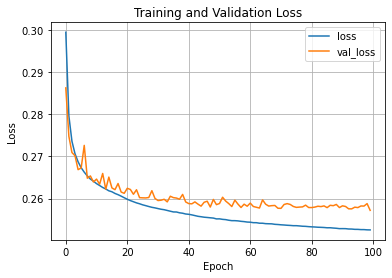

In [114]:
plot_loss(nn_history)

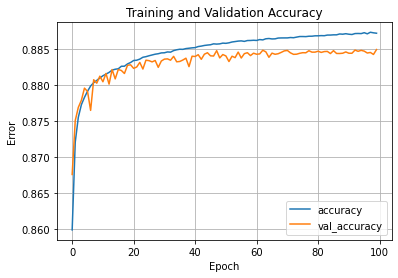

In [115]:
plot_acc(nn_history)

##### Confusion Matrix

As can be seen below, the model predicted both True Negative and True Positive fairly well with at 43% and 45% respectively.

Text(0.5, 1.0, 'Confusion Matrix as Percentage')

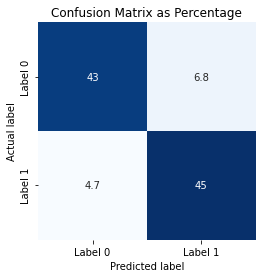

In [144]:
y_predicted2 = nn_model2.predict(X_test_scaled) > 0.5
mat = confusion_matrix(y_test, y_predicted2)
mat_percent = mat / len(y_test) * 100
labels = ['Label 0', 'Label 1']
 
sns.heatmap(mat_percent, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Confusion Matrix as Percentage")

##### Accuracy 
With 4 layer neural network, it achieved 89% accuracy.

In [118]:
print(f"Accuracy of binary classification is {accuracy_score(y_test, y_predicted2)}")

Accuracy of binary classification is 0.885015


There is a slight imporvement of 1% accuracy with 4 layers neural network, we decide to use model2 which is composed of 3 hidden layers. It is only slightly more complicated and slightly more accurate.

## Case Conclusions
In order to predict the existence of a new particle, a fully connected Deep Neural Network with 3 hidden layers was trained. We propose this model purely for prediction accuracy. Although it is not very interpretable, prediction accuracy was sole goal of this study. Our proposed neural network model achieves 89% accuracy with relatively short train time. 